In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Robertson's problem

In [2]:
def robertson(u, t, k1, k2, k3):
    dy1 = -k1 * u[0] + k2 * u[1] * u[2]
    dy2 = k1 * u[0] - k2 * u[1] * u[2] - k3 * u[1]**2
    dy3 = k3 * u[1]**2
    return np.array([dy1, dy2, dy3])

def FE(u0, N, k1, k2, k3, h=0.1):
    u = [u0]
    for i in range(1, N):
        t = i*h
        u_1 = u[i-1] + h * robertson(u[i-1], t, k1, k2, k3)
        u.append(u_1)
    return u

def BE(u0, N, k1, k2, k3, h=0.1):
    
    

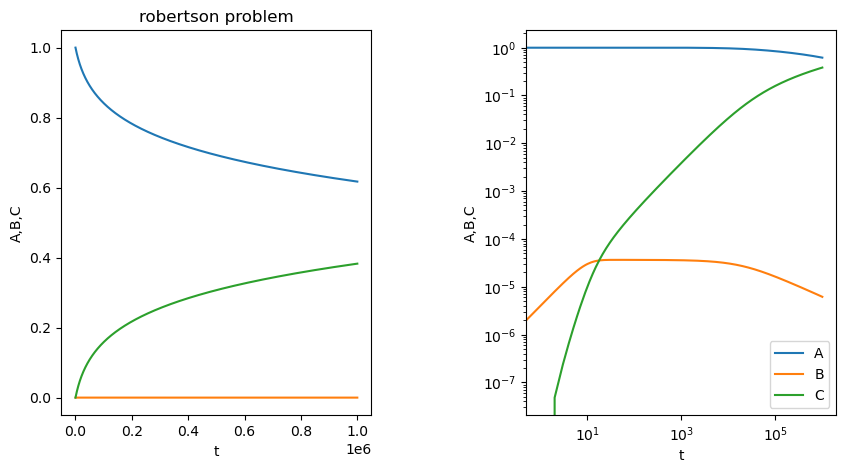

In [3]:
N = 1000000
h = 0.0001
FE = FE([1,0,0], N, 0.04, 1e4, 3e7, h)
A = [item[0] if isinstance(item, (list, np.ndarray)) else item for item in FE]
B = [item[1] if isinstance(item, (list, np.ndarray)) else item for item in FE]
C = [item[2] if isinstance(item, (list, np.ndarray)) else item for item in FE]
t = [t for t in range(N)]
fig,(x1,x2)=plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
x1.plot(t, A, label = 'A')
x1.plot(t, B, label = 'B')
x1.plot(t,C , label = 'C')
x1.set_xlabel('t')
x1.set_ylabel('A,B,C')
x1.set_title("robertson problem")
x2.loglog(t, A, label = 'A')
x2.loglog(t, B, label = 'B')
x2.loglog(t,C , label = 'C')
x2.set_xlabel('t')
x2.set_ylabel('A,B,C')
plt.legend()
plt.show()


# Jacobiana e seus autovalores:

In [4]:
def robertson(u, t, k1, k2, k3):
    dy1 = -k1 * u[0] + k2 * u[1] * u[2]
    dy2 = k1 * u[0] - k2 * u[1] * u[2] - k3 * u[1]**2
    dy3 = k3 * u[1]**2
    return np.array([dy1, dy2, dy3])

def jacobiano(u, t, k1, k2, k3):
    J = [[-k1, k2*u[2], k2*u[1]],
         [k1, (k2*u[2])-(2*k3*u[1]), -k2*u[1]],
         [0, 2*k3*u[1], 0]]
    return np.linalg.eigvals(np.array(J))

def FE_Jac(u0, N, k1, k2, k3, h=0.1, T = []):
    u = [u0]
    autovalores = []
    for i in range(1, N):
        u_1 = u[i-1] + h * robertson(u[i-1], i, k1, k2, k3)
        u.append(u_1)
        if i in t:
            autovalores.append(jacobiano(u_1, i, k1, k2, k3))
    return autovalores

N = 1000000
h = 0.0001
t = [1, 10, 100, 1000]
autovalores = FE_Jac([1,0,0], N, 0.04, 1e4, 3e7, h, t)
for i, array in enumerate(autovalores):
    for j, value in enumerate(array):
        print(f'Em T = {t[i]}, temos lambda_{j+1} = {value}')

Em T = 1, temos lambda_1 = -239.95998665999602
Em T = 1, temos lambda_2 = -2.1042683612976358e-18
Em T = 1, temos lambda_3 = -0.0800133400040769
Em T = 10, temos lambda_1 = -1795.5981045223482
Em T = 10, temos lambda_2 = -3.421278451941498e-17
Em T = 10, temos lambda_3 = -0.3394041459181663
Em T = 100, temos lambda_1 = -2183.0347947440846
Em T = 100, temos lambda_2 = -8.129073578628547e-18
Em T = 100, temos lambda_3 = -0.4051118352985734
Em T = 1000, temos lambda_1 = -2109.0322947245036
Em T = 1000, temos lambda_2 = 1.841344759378108e-17
Em T = 1000, temos lambda_3 = -0.4039731849745849
